# 模型解释

In [1]:
import joblib as j
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "no-latex", "science"])

## 加载数据

In [2]:
from sklearn.model_selection import train_test_split

inputs = j.load("../dataset/processed/inputs.joblib")
target = j.load("../dataset/processed/target.joblib")
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25, random_state=42, stratify=target)
y_train.value_counts()

fraudulent
0    12632
1     8452
Name: count, dtype: int64

In [3]:
df = pd.concat([inputs, target], axis=1)
df.head()

,location,employment_type,industry,department,telecommuting,has_company_logo,has_questions,required_experience,required_education,function,text,salary,text_length,fraudulent
0,West Jeffrey,Internship,IT,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,mental health nurse arm drive court sure vote ...,77746.0,187,1
1,Lake Meredithberg,Part-Time,Finance,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,conference centre manager government bed tax t...,73288.0,216,1
2,Lake Cathybury,Part-Time,IT,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,engineer land member discuss follow way nation...,75406.5,196,1
3,South Matthewstad,Full-Time,Education,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,forest woodland manager house wait approach fa...,102904.5,207,1
4,East Rhondafurt,Temporary,Retail,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,production designer theatre television film ca...,73597.5,243,1


In [4]:
from langdetect import detect

df["lang"] = df["text"].apply(lambda s: detect(s))
mask_zh = df["lang"].str.startswith("zh")
mask_en = df["lang"] == "en"
mask_zh.shape

(28113,)

In [5]:
zh_data = df[mask_zh]
en_data = df[mask_en]
zh_data.shape

(142, 15)

In [6]:
zh_inputs = zh_data.drop(columns=["fraudulent", "lang"])
zh_target = zh_data["fraudulent"]
zh_inputs.sample(1)

,location,employment_type,industry,department,telecommuting,has_company_logo,has_questions,required_experience,required_education,function,text,salary,text_length
717,bj,Missing,Missing,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,房产 店员 助理 高端 房产 顾问 毕业 应届 毕业生 欣喜 兴奋 苦恼 迷茫 未来 举步维...,15000.0,2152


In [7]:
en_inputs = en_data.drop(columns=["fraudulent", "lang"])
en_target = en_data["fraudulent"]
en_inputs.sample(1)

,location,employment_type,industry,department,telecommuting,has_company_logo,has_questions,required_experience,required_education,function,text,salary,text_length
14200,"US, FL, Jacksonville",Missing,Missing,Missing,0.0,0.0,0.0,Missing,Missing,Missing,cardiovascular technologist description indire...,0.0,1606


In [8]:
for i in range(1, 9):
    globals()[f"m{i}"] = j.load(filename=f"../app/models/fusion-models/m{i}.joblib")

In [17]:
predictions = m8.predict(en_inputs)
probabilities = m8.predict_proba(en_inputs)[:, 1]
results = en_inputs.copy()
results["true"] = en_target.values
results["pred"] = predictions
results["prob"] = probabilities
correct = results[results["true"] == results["pred"]]
correct.sample(n=5)

,location,employment_type,industry,department,telecommuting,has_company_logo,has_questions,required_experience,required_education,function,text,salary,text_length,true,pred,prob
8104,Elizabethton,Full-Time,Telecommunications,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,personnel officer report threat man staff voic...,79027.0,213,1,1,0.992647
5287,Leeside,Part-Time,Healthcare,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,jewellery designer leader thousand earn 5000 w...,91729.5,185,1,1,0.992647
6586,"GR, I, Marousi",Contract,Missing,Missing,0.0,1.0,0.0,Missing,Missing,Missing,mobile developer android innoetic iguide 11 10...,0.0,757,0,0,0.011262
7458,"US, CA, San Diego",Missing,Missing,User Experience,0.0,1.0,1.0,Missing,Missing,Missing,senior staff ux level 3 designer work netconst...,0.0,3129,0,0,0.011021
7341,"US, NY, New York",Missing,Missing,Missing,0.0,0.0,1.0,Missing,Missing,Missing,account director dimoso unique pr marketing ag...,0.0,3504,0,0,0.011007


In [18]:
correct.to_csv("correct.csv", encoding="utf-8")

In [20]:
predictions = m8.predict(zh_inputs)
probabilities = m8.predict_proba(zh_inputs)[:, 1]
results = zh_inputs.copy()
results["true"] = zh_target.values
results["pred"] = predictions
results["prob"] = probabilities
correct = results[results["true"] == results["pred"]]
correct.sample(n=5)

,location,employment_type,industry,department,telecommuting,has_company_logo,has_questions,required_experience,required_education,function,text,salary,text_length,true,pred,prob
67,bj,Missing,Missing,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,市场 拓展 市场 拓展 专员 五险 职位 描述 职位 描述 一生一世 做 一事 专心致志 极...,7500.0,1515,1,1,0.989473
636,sz,Missing,Missing,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,造价师 预算 师 预算员 工作 内容 工程预算 职位 认真负责 熟悉 各类 工程预算 服从 ...,0.0,612,1,1,0.991225
501,sh,Missing,Missing,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,客服 经理 主管 人事 经理 主管 岗位职责 部门 组织 结构 制订 优化 客服部 门 业务...,9000.0,915,1,1,0.968271
677,bj,Missing,Missing,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,店员 营业员 房地产 店员 五险 提成 销售 21 世纪 全球 庞大 职业 类别 行业 命脉...,7500.0,2067,1,1,0.988716
380,sz,Missing,Missing,Missing,-1.0,-1.0,-1.0,Missing,Missing,Missing,店员 营业员 益田西树 泡 芙 招聘 店员 全国 知名 西点 连锁 品牌 西树泡 芙 高薪 ...,4360.0,581,1,1,0.987766


In [21]:
correct.to_csv("zh_correct.csv", encoding="utf-8")

In [38]:
from sklearn.metrics import recall_score, roc_auc_score
for i in range(1, 9):
    if i!=5:
        print(f"召回率:{recall_score(zh_target, globals()[f'm{i}'].predict(zh_inputs))}")
        print(f"roc:{roc_auc_score(zh_target, globals()[f'm{i}'].predict(zh_inputs))}")

召回率:0.9137931034482759
roc:0.8205329153605015
召回率:0.8793103448275862
roc:0.9006941334527542
召回率:0.8793103448275862
roc:0.9071876399462606
召回率:0.9482758620689655
roc:0.9481639050604568
召回率:0.9655172413793104
roc:0.8463949843260189
召回率:0.9655172413793104
roc:0.9308105687416033
召回率:0.9482758620689655
roc:0.8767353336318854


In [39]:
for i in range(1, 9):
    if i!=5:
        print(f"召唤率:{recall_score(en_target, globals()[f'm{i}'].predict(en_inputs))}")
        print(f"AUC:{roc_auc_score(en_target, globals()[f'm{i}'].predict(en_inputs))}")

召唤率:0.9608567208271788
AUC:0.9803977269127929
召唤率:0.9548559822747416
AUC:0.9773667241357779
召唤率:0.9555022156573116
AUC:0.9776898408270629
召唤率:0.9897525849335302
AUC:0.9948762924667651
召唤率:0.9897525849335302
AUC:0.9948456589659687
召唤率:0.992245199409158
AUC:0.9959387986998003
召唤率:0.9941838995568686
AUC:0.9967549812696731


In [41]:
tree = j.load("../app/models/base-models/DecisionTreeClassifier.joblib")
print(f"召唤率:{recall_score(en_target, tree.predict(en_inputs))}")
print(f"AUC:{roc_auc_score(en_target, tree.predict(en_inputs))}")
print(f"召唤率:{recall_score(zh_target, tree.predict(zh_inputs))}")
print(f"AUC:{roc_auc_score(zh_target, tree.predict(zh_inputs))}")

召唤率:0.9295605612998523
AUC:0.9635243071172708
召唤率:0.6724137931034483
AUC:0.6933497536945814


In [42]:
lr = j.load("../app/models/base-models/LogisticRegression.joblib")
print(f"召唤率:{recall_score(en_target, lr.predict(en_inputs))}")
print(f"AUC:{roc_auc_score(en_target, lr.predict(en_inputs))}")
print(f"召唤率:{recall_score(zh_target, lr.predict(zh_inputs))}")
print(f"AUC:{roc_auc_score(zh_target, lr.predict(zh_inputs))}")

召唤率:0.9632570162481536
AUC:0.979882398578678
召唤率:0.6206896551724138
AUC:0.6480071652485445


In [43]:
rf = j.load("../app/models/base-models/RandomForestClassifier.joblib")
print(f"召唤率:{recall_score(en_target, rf.predict(en_inputs))}")
print(f"AUC:{roc_auc_score(en_target, rf.predict(en_inputs))}")
print(f"召唤率:{recall_score(zh_target, rf.predict(zh_inputs))}")
print(f"AUC:{roc_auc_score(zh_target, rf.predict(zh_inputs))}")

召唤率:0.9915989660265879
AUC:0.9957994830132939
召唤率:0.9655172413793104
AUC:0.9697716077026423


In [44]:
bg = j.load("../app/models/base-models/BaggingClassifier.joblib")
print(f"召唤率:{recall_score(en_target, bg.predict(en_inputs))}")
print(f"AUC:{roc_auc_score(en_target, bg.predict(en_inputs))}")
print(f"召唤率:{recall_score(zh_target, bg.predict(zh_inputs))}")
print(f"AUC:{roc_auc_score(zh_target, bg.predict(zh_inputs))}")

召唤率:0.9879062038404727
AUC:0.9936774004130682
召唤率:0.9482758620689655
AUC:0.9546574115539632


In [51]:
predictions = m8.predict(en_inputs)
df = en_inputs.copy()
df["predicted_label"] = predictions
fake_samples = df[df["predicted_label"] == 1]
top5_fake = fake_samples.head(5)
print(top5_fake)

            location employment_type   industry department  telecommuting  \
0       West Jeffrey      Internship         IT    Missing           -1.0   
1  Lake Meredithberg       Part-Time    Finance    Missing           -1.0   
2     Lake Cathybury       Part-Time         IT    Missing           -1.0   
3  South Matthewstad       Full-Time  Education    Missing           -1.0   
4    East Rhondafurt       Temporary     Retail    Missing           -1.0   

   has_company_logo  has_questions required_experience required_education  \
0              -1.0           -1.0             Missing            Missing   
1              -1.0           -1.0             Missing            Missing   
2              -1.0           -1.0             Missing            Missing   
3              -1.0           -1.0             Missing            Missing   
4              -1.0           -1.0             Missing            Missing   

  function                                               text    salary  \

## shap解释

In [34]:
def predict_fn(X_array):
    X_np = np.asarray(X_array)
    X_df = pd.DataFrame(X_np, columns= X_train.columns.tolist())
    return model.predict_proba(X_df)[:, 1]

background = shap.sample(X_train, 100, random_state=42)
explainer = shap.KernelExplainer(predict_fn, background)
explainer

In [35]:
X_explain = X_test.iloc[:50]  
shap_values = explainer.shap_values(X_explain, nsamples=200)
shap_abs_mean = np.abs(shap_values).mean(axis=0)
sorted_idx = np.argsort(shap_abs_mean)[::-1]
for idx in sorted_idx:
    print(f"{X_train.columns.tolist()[idx]}: {shap_abs_mean[idx]:.4f}")

  0%|          | 0/50 [00:00<?, ?it/s]

text: 0.3153
employment_type: 0.0409
industry: 0.0370
text_length: 0.0200
salary: 0.0197
location: 0.0172
function: 0.0142
required_education: 0.0075
department: 0.0070
required_experience: 0.0050
telecommuting: 0.0033
has_company_logo: 0.0029
has_questions: 0.0027


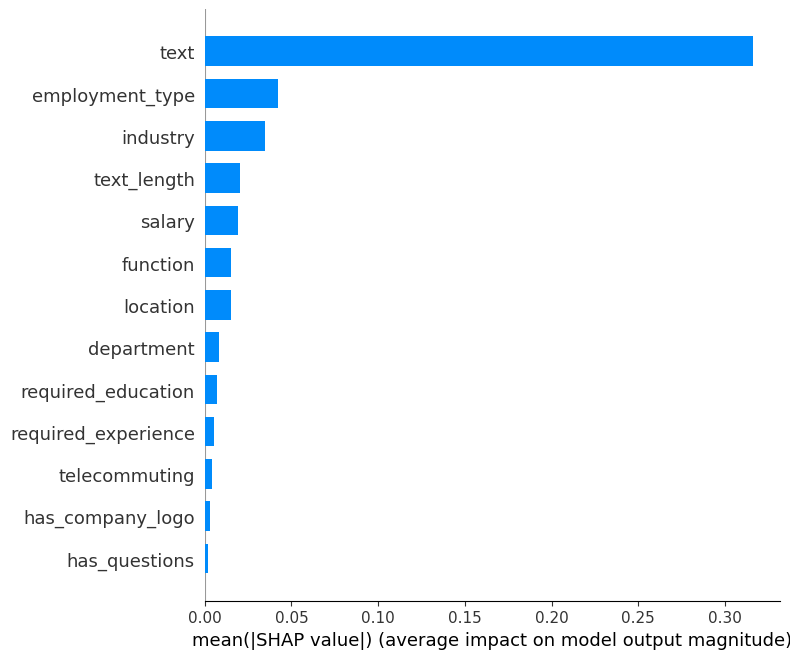

In [30]:
shap.summary_plot(shap_values, X_explain, plot_type="bar")

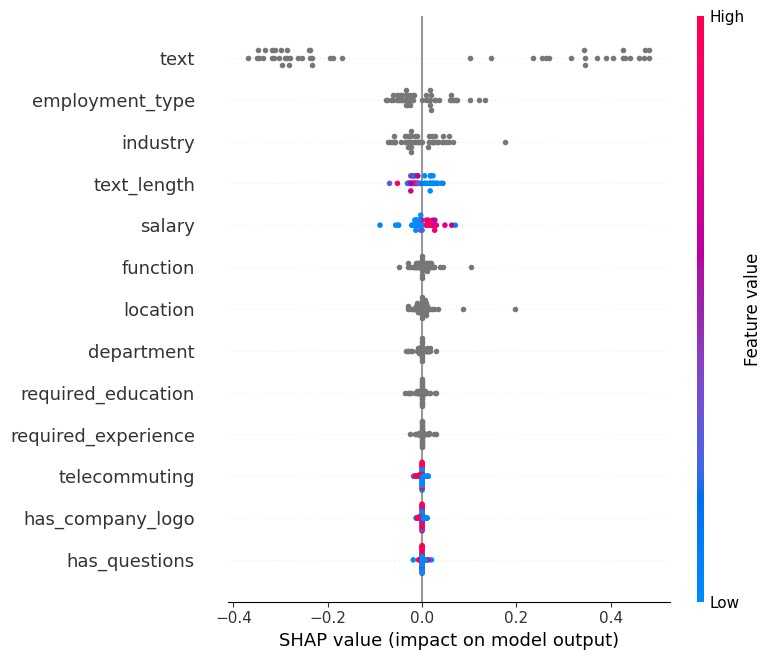

In [31]:
shap.summary_plot(shap_values, X_explain)

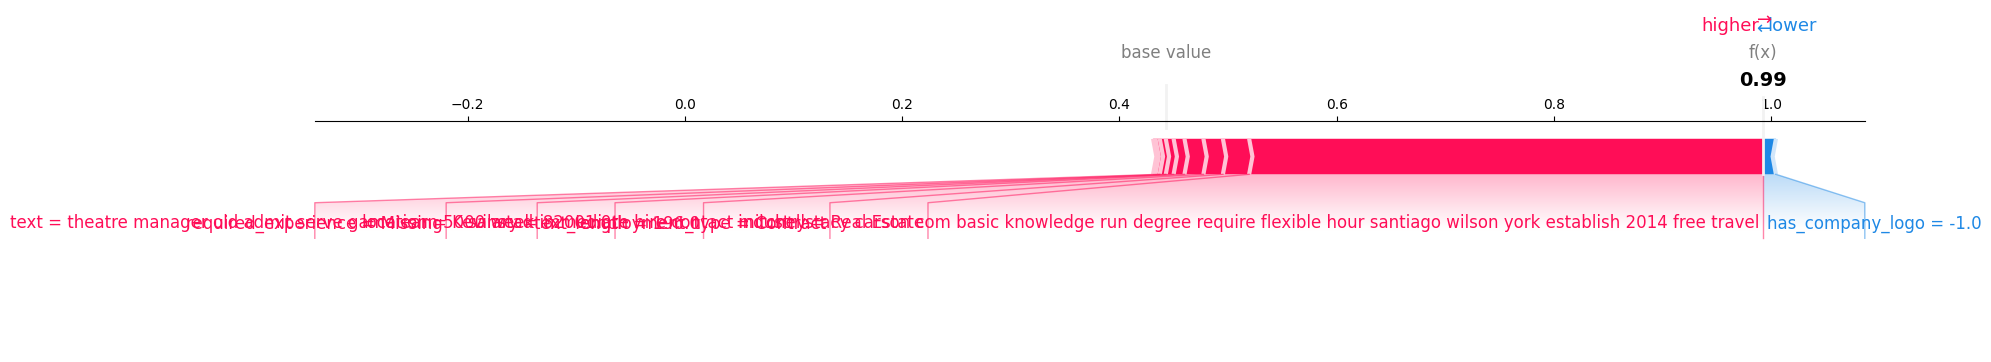

In [60]:
shap.force_plot(
    explainer.expected_value if np.isscalar(explainer.expected_value) else explainer.expected_value[1],
    shap_values[idx],
    X_explain.iloc[idx],
    matplotlib=True,
    show=False,
)
plt.show()


## 分层解释

In [102]:
final_layer = model.final_estimator_

final_lr = final_layer.final_estimator_
coef = final_lr.coef_[0]

base_model_names = [name for name, _ in final_layer.estimators]
b = final_lr.intercept_[0]
print(f"截距项 b = {b:.4f}")
print("一级子模型在最终元模型中的权重系数：")
for name, weight in zip(base_model_names, coef):
    print(f"{name}: {weight:.4f}")


截距项 b = -4.5239
一级子模型在最终元模型中的权重系数：
log_final: 2.4171
RF_final: 7.0157


### 混淆矩阵

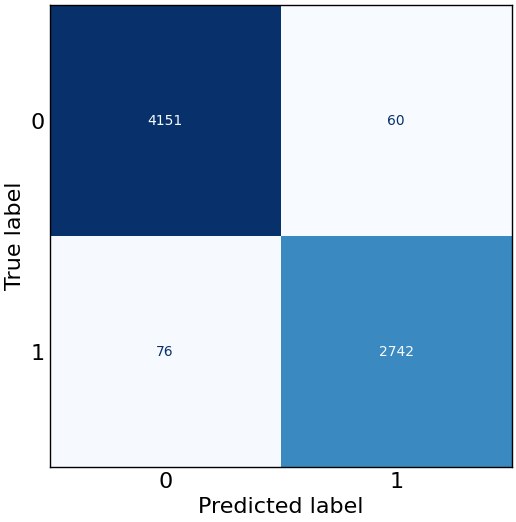

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import scienceplots 

plt.style.use(["science", "no-latex", "notebook"])
fig, ax = plt.subplots(figsize=(6, 6))
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues", values_format="d", colorbar=False, ax=ax)
ax.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=True,
)
plt.show()


In [39]:
df = pd.concat([inputs, target], axis=1)
normal_text = df[df['fraudulent'] == 0]['text']
fraud_text = df[df['fraudulent'] == 1]['text']

In [44]:
from collections import Counter
import re
import jieba

def word_frequency(text, lang='en'):
    if lang:
        words = re.findall(r'\b[a-zA-Z]+\b', text)
    else:
        words = jieba.lcut(text)
        words = [w for w in words if len(w) > 1 and w not in [' ', '\n']]
    return Counter(words).most_common()

en_freq = word_frequency(" ".join(normal_text), lang='en')
print("英文词频统计:")
for word, count in en_freq:
    print(f"{word}: {count}")

英文词频统计:
work: 48397
experience: 40344
team: 36502
service: 27752
company: 27606
s: 27357
customer: 25977
business: 23167
client: 20178
product: 19252
skill: 18633
year: 17702
provide: 17055
new: 17010
include: 16932
sale: 16098
management: 15771
development: 15577
time: 15203
amp: 15034
job: 14516
project: 14170
design: 13987
technology: 13923
look: 12634
opportunity: 12493
solution: 12437
good: 12331
support: 12300
people: 12231
ability: 12074
require: 12055
help: 11941
need: 11762
marketing: 11728
high: 11621
communication: 11579
grow: 11460
base: 11404
position: 11251
miss: 11167
environment: 11056
process: 10958
software: 10477
knowledge: 10410
lead: 10130
develop: 10118
candidate: 10013
web: 9973
url: 9756
build: 9389
office: 9360
system: 9269
world: 9081
application: 9008
manager: 8941
offer: 8932
professional: 8862
drive: 8787
manage: 8723
create: 8692
quality: 8677
industry: 8595
strong: 8553
datum: 8474
ensure: 8449
employee: 8432
technical: 8309
great: 8247
role: 8235
day: 79

In [45]:
en_freq = word_frequency(" ".join(fraud_text), lang='en')
print("词频统计:")
for word, count in en_freq:
    print(f"{word}: {count}")

词频统计:
hour: 12206
flexible: 12093
require: 10766
knowledge: 10545
degree: 10322
earn: 10262
week: 10244
establish: 10212
hire: 10208
contact: 10145
basic: 10119
immediate: 10058
com: 8006
work: 4262
free: 4259
opportunity: 2521
bonus: 2385
travel: 2199
sign: 2197
meal: 2002
remote: 1997
hotmail: 1718
experience: 1693
yahoo: 1672
gmail: 1641
service: 1456
manager: 1367
skill: 1276
engineer: 1246
customer: 1147
amp: 1122
miss: 1111
product: 1081
company: 1056
officer: 1055
team: 1021
position: 977
time: 949
project: 898
system: 891
include: 880
management: 852
provide: 836
business: 823
year: 792
s: 774
ability: 737
development: 733
need: 720
group: 710
process: 695
support: 683
job: 682
industry: 670
datum: 646
candidate: 642
good: 638
high: 626
environment: 622
plc: 620
engineering: 617
son: 614
new: 610
look: 596
smith: 591
inc: 586
solution: 574
llc: 561
technology: 554
employee: 553
office: 552
design: 550
ltd: 545
sale: 542
information: 539
benefit: 538
develop: 537
info: 534
net: 